**Step 1: Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

**Step 2: Loading the dataset and exploring it**

In [ ]:
# loading data
d=pd.read_csv("/content/car data.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
d.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Step 3: Exploratory Data Analysis**

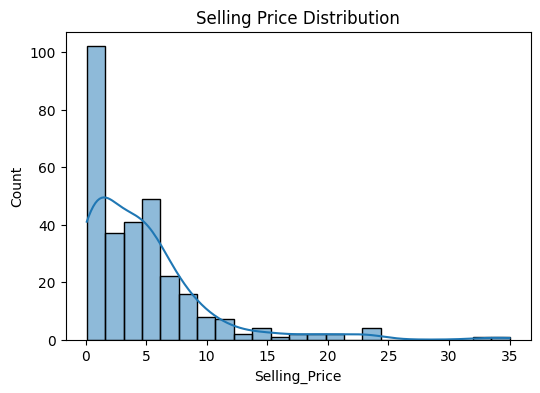

In [ ]:
#Selling Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(d["Selling_Price"],kde=True)
plt.title("Selling Price Distribution")
plt.show()

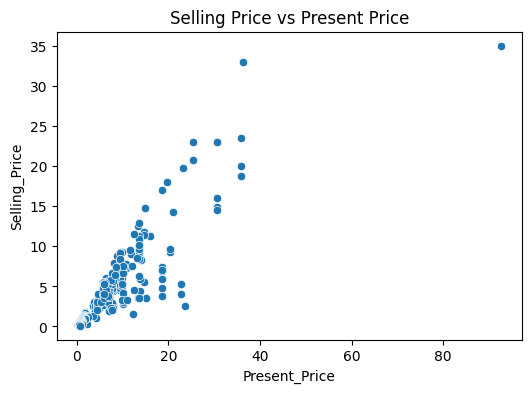

In [ ]:
# selling price vs present price
plt.figure(figsize=(6,4))
sns.scatterplot(x=d["Present_Price"],y=d["Selling_Price"])
plt.title("Selling Price vs Present Price")
plt.show()

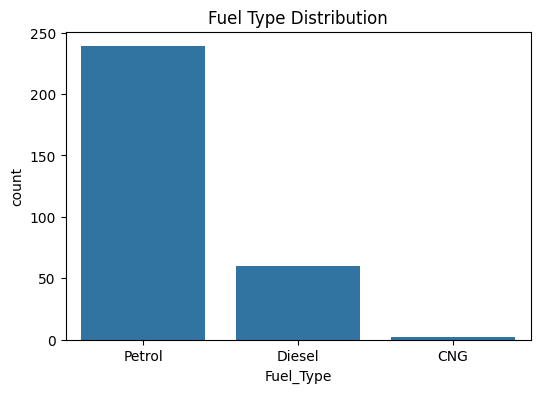

In [ ]:
# fuel type count
plt.figure(figsize=(6,4))
sns.countplot(x=d["Fuel_Type"])
plt.title("Fuel Type Distribution")
plt.show()

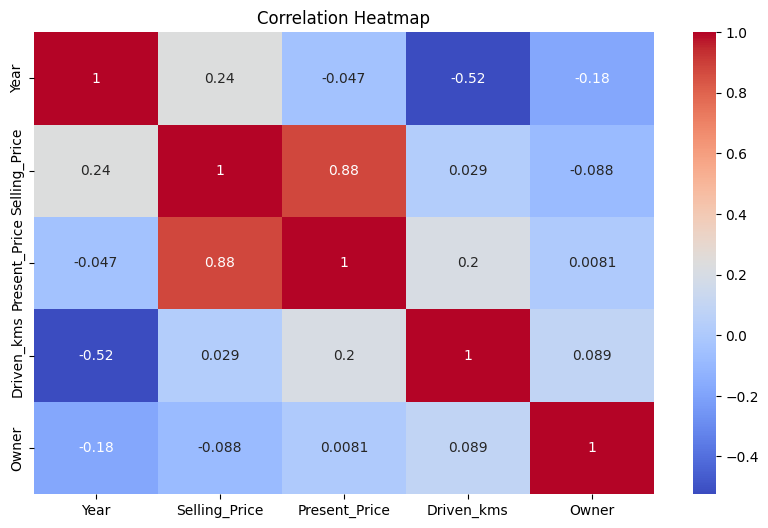

In [ ]:
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(d.select_dtypes(include=np.number).corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Step 4: Data preprocessing**

In [ ]:
# drop text identifier column
if "Car_Name" in d.columns:
    d.drop("Car_Name",axis=1,inplace=True)

# car age feature
d["Car_Age"]=2024-d["Year"]
d.drop("Year",axis=1,inplace=True)

# categorical columns
cat=["Fuel_Type","Selling_type","Transmission"]

for c in cat:
    d[c]=d[c].astype(str).str.strip()
    d[c].fillna(d[c].mode()[0],inplace=True)

# numeric columns fill
num=d.select_dtypes(include=np.number).columns
for n in num:
    d[n].fillna(d[n].median(),inplace=True)

# one hot encoding
d=pd.get_dummies(d,columns=cat,drop_first=True)

/tmp/ipython-input-2595471392.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d[c].fillna(d[c].mode()[0],inplace=True)
/tmp/ipython-input-2595471392.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

**Step 5: Model Building and Prediction**

In [ ]:
# define x and y
x=d.drop("Selling_Price",axis=1)
y=d["Selling_Price"]

# dynamic split (handles small datasets)
ts=0.2 if len(d)>5 else 0.5

xtr,xts,ytr,yts=train_test_split(x,y,test_size=ts,random_state=42)

# model
ml=LinearRegression()
ml.fit(xtr,ytr)

# prediction
yp=ml.predict(xts)

**Step 6: Model prediction evaluation**

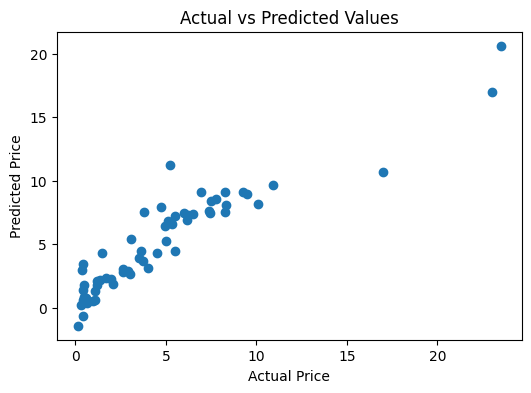

In [ ]:
# Actual vs Predicted plot
plt.figure(figsize=(6,4))
plt.scatter(yts,yp)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
# evaluation
print("Samples:",len(d))
print("R2:",r2_score(yts,yp))
print("MAE:",mean_absolute_error(yts,yp))
print("RMSE:",np.sqrt(mean_squared_error(yts,yp)))

Samples: 301
R2: 0.8488707839193155
MAE: 1.2163740193330348
RMSE: 1.865837568094237


                     Key takeaways from the Model
1. Selling price increases with higher present price

2. Older cars have lower resale value

3. Higher driven kilometers reduce selling price

4. Automatic transmission cars generally sell at higher prices

5. Fuel type affects resale price

6. Present price is the most influential feature

7. Linear regression provides acceptable prediction accuracy